Using device: cpu


/nvme0/csmi/sarr/feelpp-scimba/.venv/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


torch loaded; device is cpu


/nvme0/csmi/sarr/feelpp-scimba/.venv/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


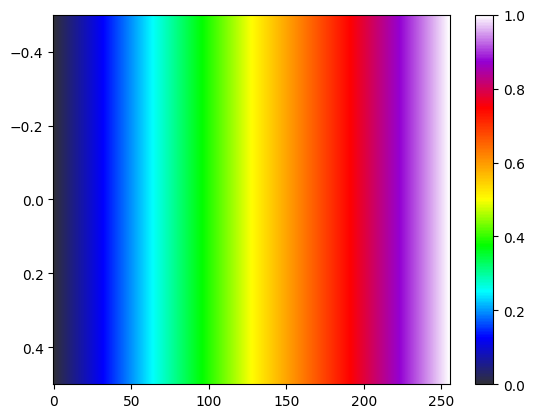

[ Starting Feel++ ] application feelpp_app version 0.1 date 2025-May-08
 . feelpp_app files are stored in /nvme0/csmi/sarr/feelpp-scimba/notebooks/feelppdb/feelpp_cfpde/np_1
 .. logfiles :/nvme0/csmi/sarr/feelpp-scimba/notebooks/feelppdb/feelpp_cfpde/np_1/logs


In [1]:
import sys
import feelpp.core as fppc
import feelpp.toolboxes.core as tb


from feelpp.scimba.Diffusion_param import ParametricDiffusion


sys.argv = ["feelpp_app"]
e = fppc.Environment(sys.argv,
                        opts=tb.toolboxes_options("coefficient-form-pdes", "cfpdes"),
                        config=fppc.localRepository('feelpp_cfpde'))

# ------------------------------------------------------------------------- #
# Parametric Diffusion problem
# - div (diff(mu) * grad (u)) = f(mu)   in Omega
#                                 u     = g(mu)   in Gamma_D 
# Omega = domain (e.g., square, disk)
# Approx = lagrange Pk of order order
# mesh of size h

# Utilisation de la classe ParametricDiffusion
P_diff = ParametricDiffusion(dim = 2)




Résolution pour mu = 0.1
Solving the parametric diffusion problem for mu = 0.1, h = 0.05...
generate mesh omega-2.geo with h=0.05 and dimension=2
[loadMesh] Loading mesh in format geo+msh: "/nvme0/csmi/sarr/feelpp-scimba/notebooks/feelppdb/feelpp_cfpde/np_1/omega-2.geo"
[loadMesh] Use default geo desc: /nvme0/csmi/sarr/feelpp-scimba/notebooks/feelppdb/feelpp_cfpde/np_1/omega-2.geo 0.05 
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Toolbox::cfpdes-2d-p1 - Use Case Study                                                                                                                                                                     |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

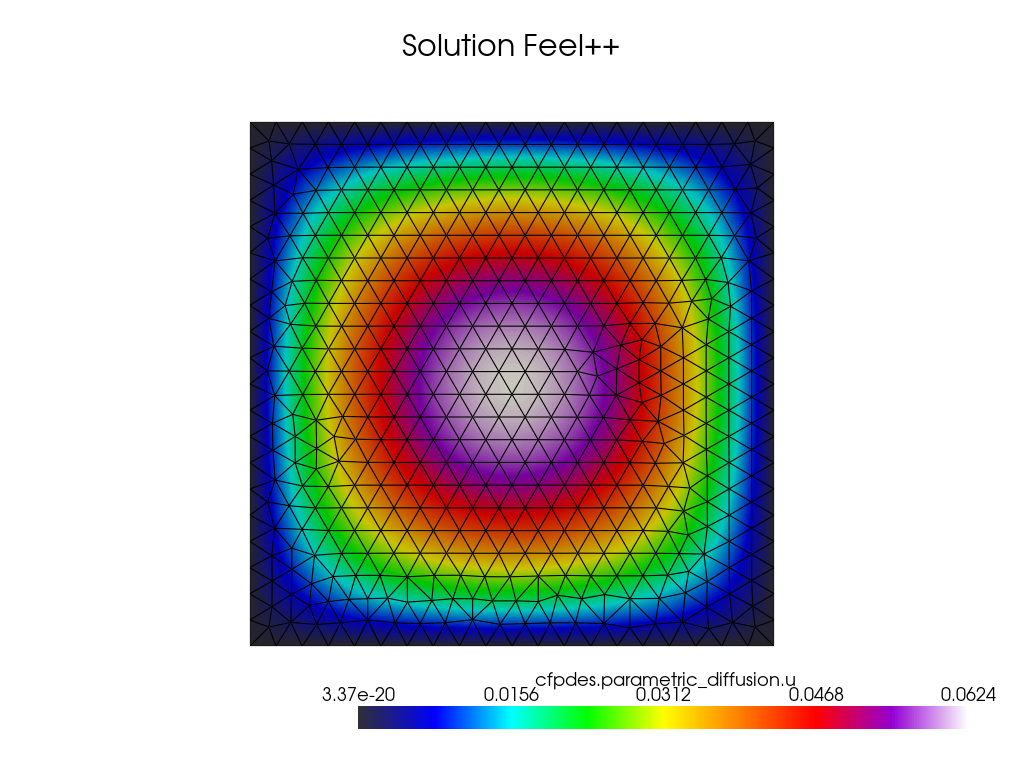

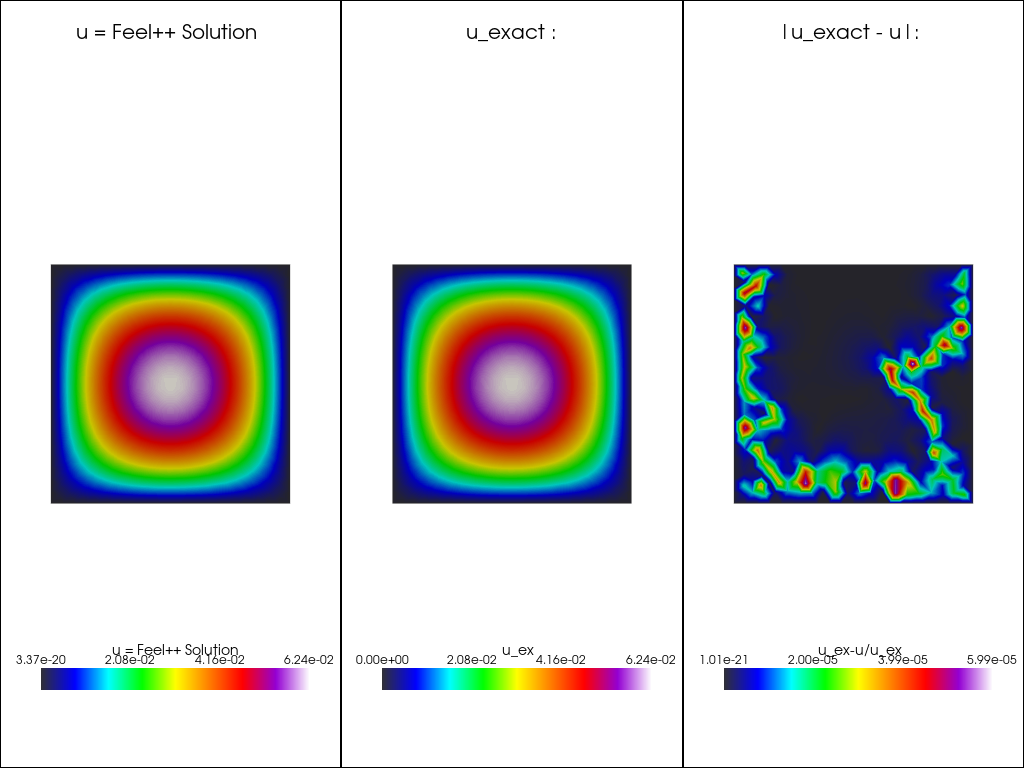

Simulation de diffusion paramétrique terminée pour mu = 0.1
Résolution pour mu = 0.5
Solving the parametric diffusion problem for mu = 0.5, h = 0.05...
generate mesh omega-2.geo with h=0.05 and dimension=2
[loadMesh] Loading mesh in format geo+msh: "/nvme0/csmi/sarr/feelpp-scimba/notebooks/feelppdb/feelpp_cfpde/np_1/omega-2.geo"
[loadMesh] Use default geo desc: /nvme0/csmi/sarr/feelpp-scimba/notebooks/feelppdb/feelpp_cfpde/np_1/omega-2.geo 0.05 
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Toolbox::cfpdes-2d-p1 - Use Case Study                                                                                                                                                         |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------

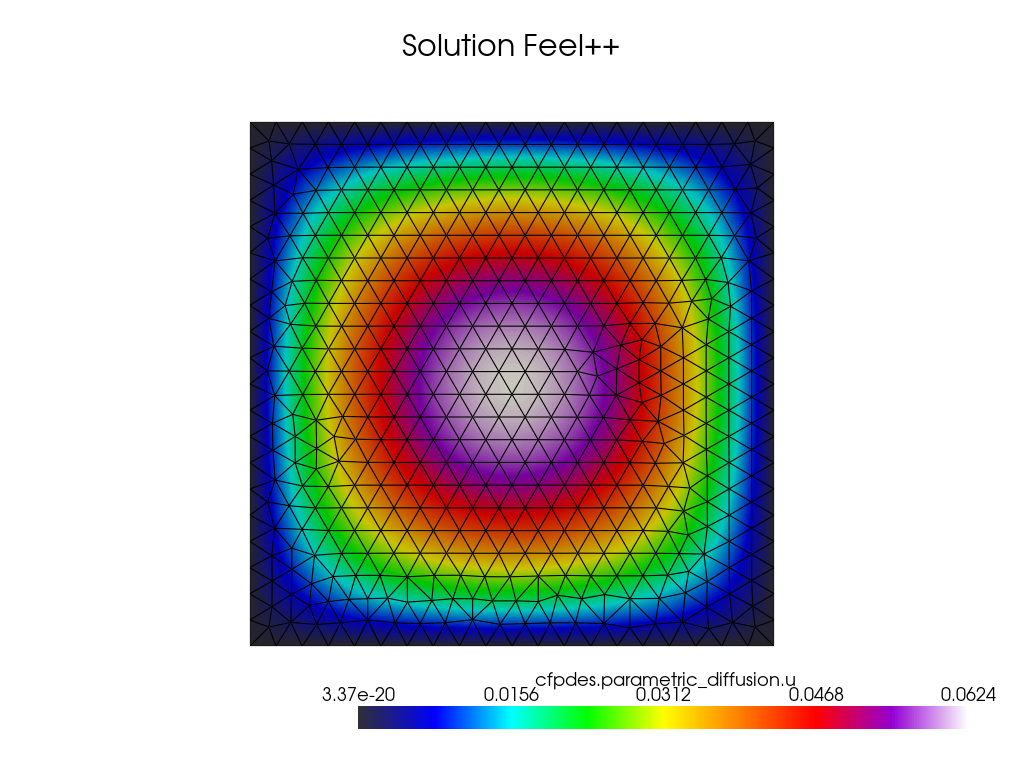

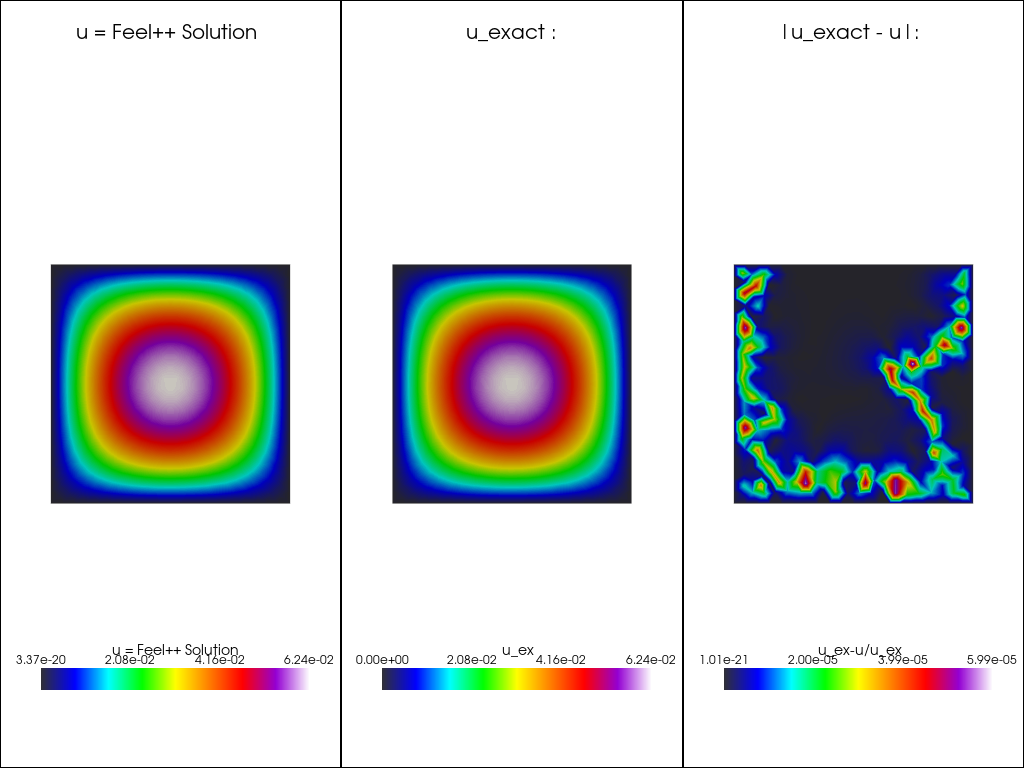

Simulation de diffusion paramétrique terminée pour mu = 0.5
Résolution pour mu = 1.0
Solving the parametric diffusion problem for mu = 1.0, h = 0.05...
generate mesh omega-2.geo with h=0.05 and dimension=2
[loadMesh] Loading mesh in format geo+msh: "/nvme0/csmi/sarr/feelpp-scimba/notebooks/feelppdb/feelpp_cfpde/np_1/omega-2.geo"
[loadMesh] Use default geo desc: /nvme0/csmi/sarr/feelpp-scimba/notebooks/feelppdb/feelpp_cfpde/np_1/omega-2.geo 0.05 
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Toolbox::cfpdes-2d-p1 - Use Case Study                                                                                                                                                                     |
+---------------------------------------------------------------------------------------------------------------------------------------

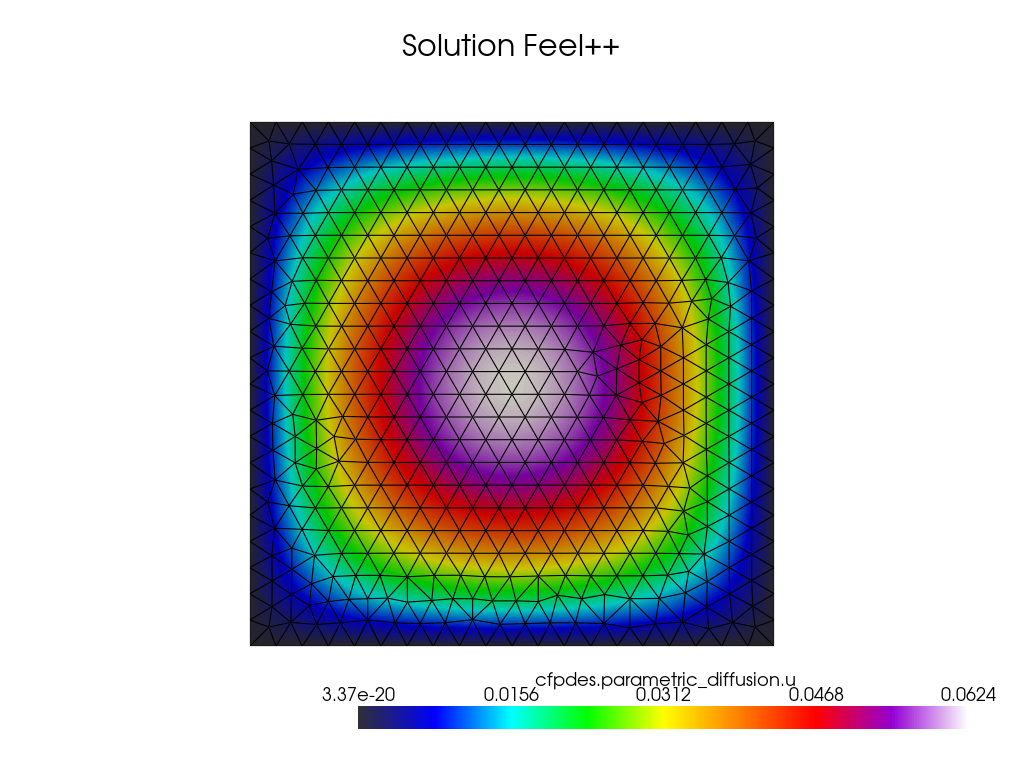

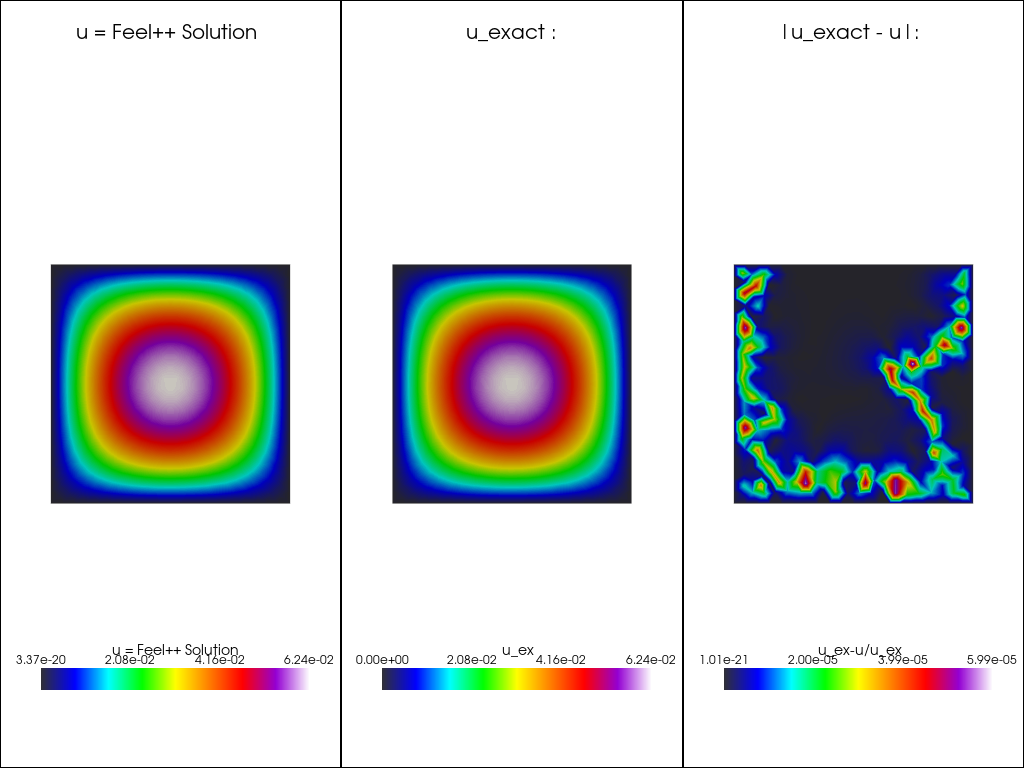

Simulation de diffusion paramétrique terminée pour mu = 1.0
Résolution pour mu = 2.0
Solving the parametric diffusion problem for mu = 2.0, h = 0.05...
generate mesh omega-2.geo with h=0.05 and dimension=2
[loadMesh] Loading mesh in format geo+msh: "/nvme0/csmi/sarr/feelpp-scimba/notebooks/feelppdb/feelpp_cfpde/np_1/omega-2.geo"
[loadMesh] Use default geo desc: /nvme0/csmi/sarr/feelpp-scimba/notebooks/feelppdb/feelpp_cfpde/np_1/omega-2.geo 0.05 
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Toolbox::cfpdes-2d-p1 - Use Case Study                                                                                                                                                                     |
+---------------------------------------------------------------------------------------------------------------------------------------

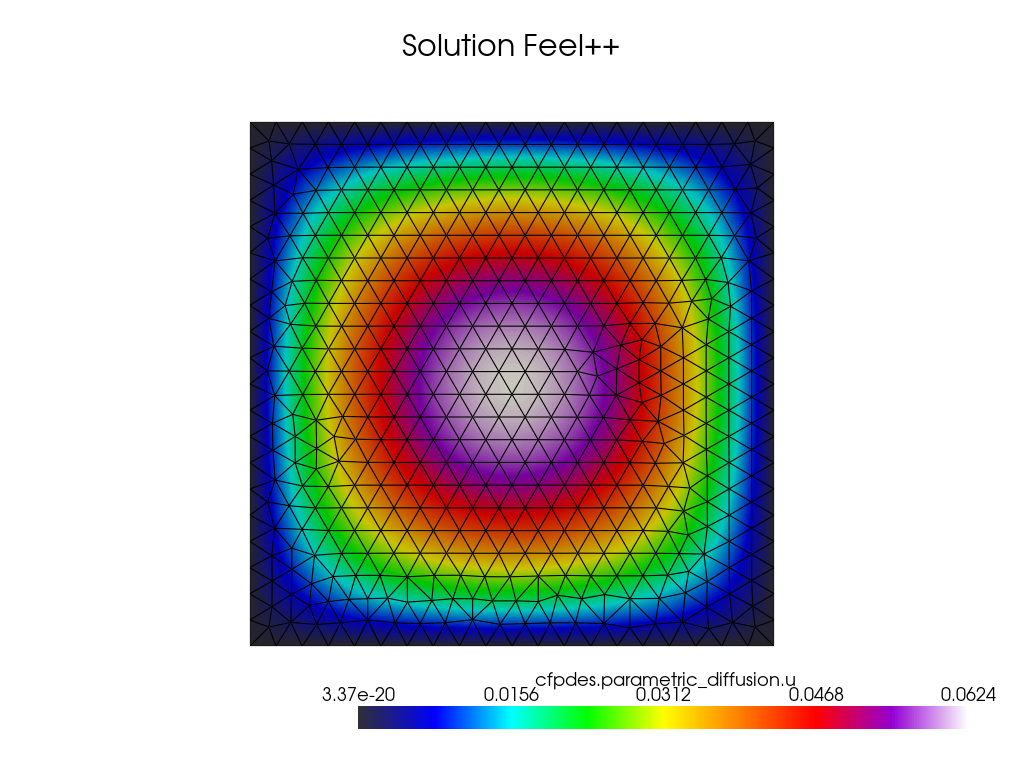

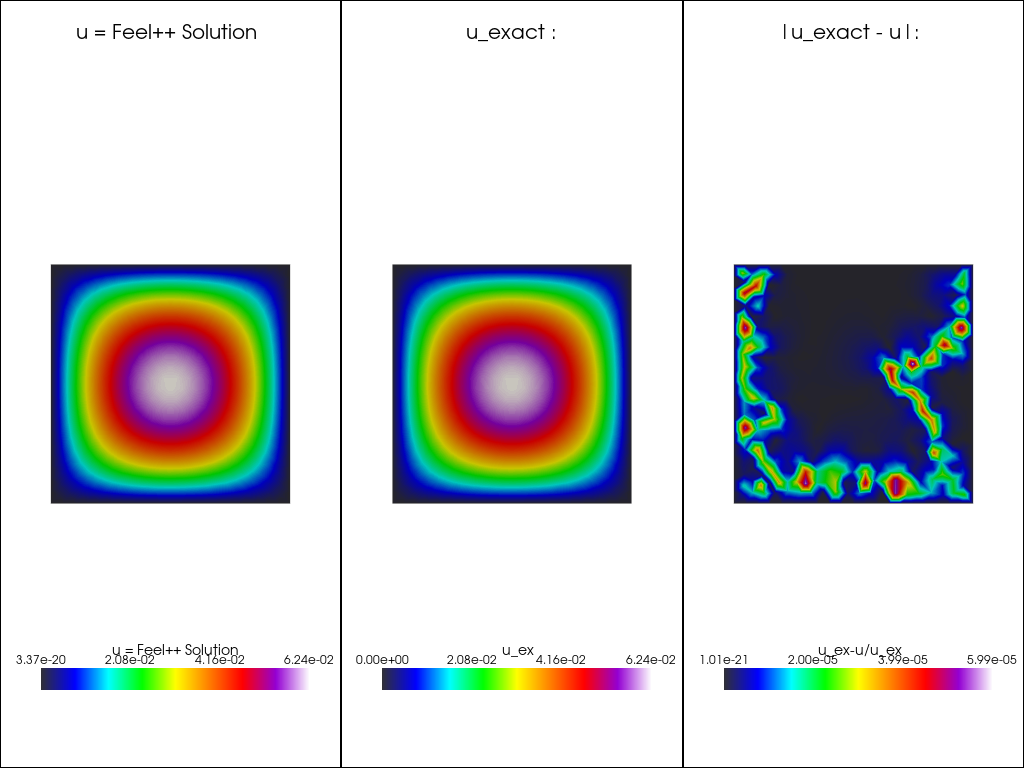

Simulation de diffusion paramétrique terminée pour mu = 2.0
Terminé les simulations de diffusion paramétrique pour toutes les valeurs de mu.


In [2]:
# Conditions limites de Dirichlet (nulles pour cette solution exacte)
g_expr = '0'
# Solution exacte
u_exact_expr = 'x*(1 - x)*y*(1 - y)'

# Différentes valeurs de mu à tester
mu_values = [0.1, 0.5, 1.0, 2.0]

for mu in mu_values:
    print(f"Résolution pour mu = {mu}")
    rhs_expr = f'2*{mu}*x*(1 - x) + 2*{mu}*y*(1 - y)'
    P_diff(h=0.05,
           mu=mu,
           rhs=rhs_expr,
           g=g_expr,
           diff='{{{mu},0,0,{mu}}}', # Coefficient de diffusion dépendant de mu (CORRECTION: trois accolades)
           plot=1,
           u_exact=u_exact_expr)
    print(f"Simulation de diffusion paramétrique terminée pour mu = {mu}")

print("Terminé les simulations de diffusion paramétrique pour toutes les valeurs de mu.")